# **Project Name - Airbnb Bookings Analysis**

### **Importing libraries**

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt     
import seaborn as sns            
import warnings
warnings.filterwarnings('ignore')

### **Load Airbnb Dataset**

In [34]:
Airbnb_df = pd.read_csv(r"C:\Users\Lenovo\Desktop\EDA final project\Airbnb NYC 2019.csv")
Airbnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# **Data Exploration and Data Cleaning**

In [35]:
Airbnb_df.head().T

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


In [36]:
Airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

**so now first rename few columns for better understanding of variables -**

In [37]:
rename_col = {'id':'listing_id','name':'listing_name','number_of_reviews':'total_reviews','calculated_host_listings_count':'host_listings_count'}

In [38]:
Airbnb_df = Airbnb_df.rename(columns = rename_col)
Airbnb_df.head(2)

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,last_review,reviews_per_month,host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [39]:
#checking shape of dataset
Airbnb_df.shape

(48895, 16)

In [40]:
# check duplicate rows in dataset
Airbnb_df = Airbnb_df.drop_duplicates()
Airbnb_df.count()

listing_id             48895
listing_name           48879
host_id                48895
host_name              48874
neighbourhood_group    48895
neighbourhood          48895
latitude               48895
longitude              48895
room_type              48895
price                  48895
minimum_nights         48895
total_reviews          48895
last_review            38843
reviews_per_month      38843
host_listings_count    48895
availability_365       48895
dtype: int64

**so, there is no any duplicate rows in Dataset**

In [41]:
# checking null values of each columns
Airbnb_df.isnull().sum()

listing_id                 0
listing_name              16
host_id                    0
host_name                 21
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
total_reviews              0
last_review            10052
reviews_per_month      10052
host_listings_count        0
availability_365           0
dtype: int64


**host_name** and **listing_name** are not that much of null values, so first  we are good to fill those with some substitutes in both the columns first.




In [42]:
Airbnb_df['listing_name'].fillna('unknown',inplace=True)
Airbnb_df['host_name'].fillna('no_name',inplace=True)

In [43]:
#so the null values are removed
Airbnb_df[['host_name','listing_name']].isnull().sum()

host_name       0
listing_name    0
dtype: int64

In [44]:
Airbnb_df = Airbnb_df.drop(['last_review'], axis=1)     #removing last_review column beacause of not that much important

In [45]:
Airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           48895 non-null  int64  
 1   listing_name         48895 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48895 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  total_reviews        48895 non-null  int64  
 12  reviews_per_month    38843 non-null  float64
 13  host_listings_count  48895 non-null  int64  
 14  availability_365     48895 non-null  int64  
dtypes: float64(3), int64(7), object(5)
m

In [46]:
Airbnb_df['reviews_per_month'] = Airbnb_df['reviews_per_month'].replace(to_replace=np.nan,value=0).astype('int64')

In [47]:
# the null values are replaced by 0 value
Airbnb_df['reviews_per_month'].isnull().sum()   

0

---

# **Describe the Dataset and removing outliers**

In [48]:
# describe the DataFrame 
Airbnb_df.describe()

,listing_id,host_id,latitude,longitude,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,0.806258,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.502767,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.000000,327.000000,365.000000


**Note** - price column is very important so we have to find big outliers in important columns first.

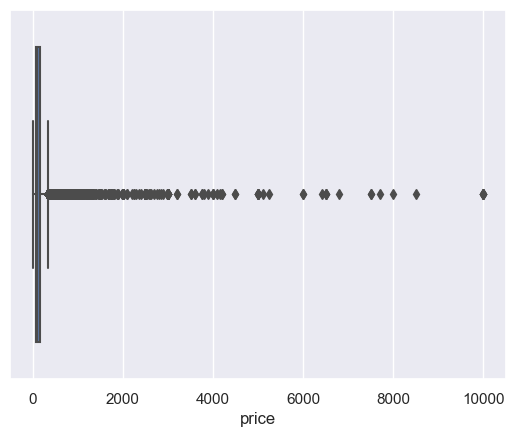

In [49]:
sns.boxplot(x = Airbnb_df['price'])

plt.show()

### **using IQR technique**

In [50]:
# writing a outlier function for removing outliers in important columns.
def iqr_technique(DFcolumn):
  Q1 = np.percentile(DFcolumn, 25)
  Q3 = np.percentile(DFcolumn, 75)
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)                        # interquantile range

  return lower_range,upper_range

In [51]:
lower_bound,upper_bound = iqr_technique(Airbnb_df['price'])

Airbnb_df = Airbnb_df[(Airbnb_df.price>lower_bound) & (Airbnb_df.price<upper_bound)]

(45918, 15)


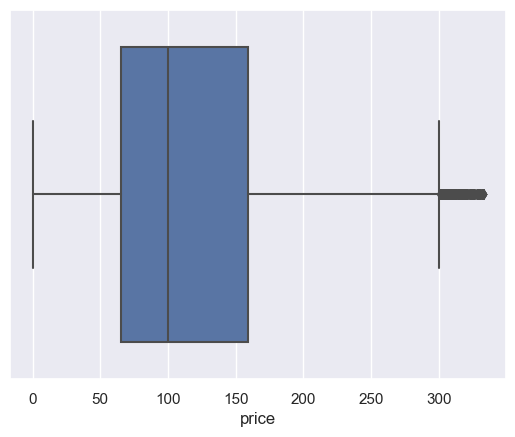

In [52]:
# so the outliers are removed from price column now check with boxplot and also check shape of new Dataframe!

sns.boxplot(x = Airbnb_df['price'])
print(Airbnb_df.shape)

In [53]:
# so here outliers are removed, see the new max price
print(Airbnb_df['price'].max())

333




---

# **Data Visualization**




   **Distribution Of Airbnb Bookings Price Range Using Histogram**


Text(0.5, 1.0, 'Distribution of Airbnb Prices')

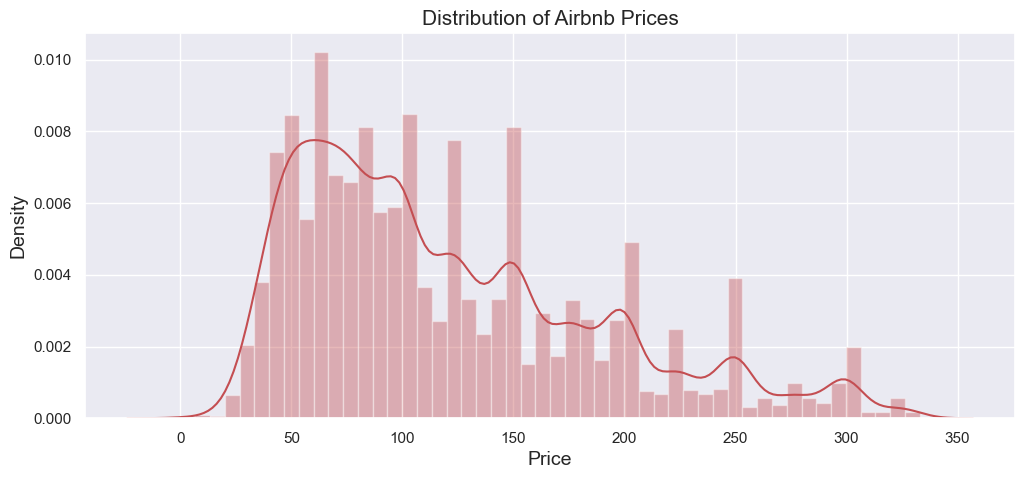

In [54]:
plt.figure(figsize=(12, 5))
sns.set_theme(style='darkgrid')
sns.distplot(Airbnb_df['price'],color=('r'))
plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of Airbnb Prices',fontsize=15)

**observations -->**

*   The range of prices being charged on Airbnb appears to be from **20 to 330 dollars** , with the majority of listings falling in the price range of **50 to 150 dollars.**

*   The distribution of prices appears to have a peak in the **50 to 150 dollars range**, with a relatively lower density of listings in higher and lower price ranges.

*   There may be fewer listings available at prices above **250 dollars**, as 
the density of listings drops significantly in this range.

---





**Average Price Of Each Neighborhood Group using Point Plot**

In [55]:
grouped = Airbnb_df.groupby("neighbourhood_group").mean()
# Reset the index of the grouped dataframe so that the neighborhood group becomes a column
neighbourhood_group_avg_price = grouped.reset_index()
neighbourhood_group_avg_price = round(neighbourhood_group_avg_price.rename(columns={"price": "avg_price"}),2)
neighbourhood_group_avg_price[['neighbourhood_group', 'avg_price']].head()

,neighbourhood_group,avg_price
0,Bronx,77.37
1,Brooklyn,105.70
2,Manhattan,145.90
3,Queens,88.90
4,Staten Island,89.24


Text(0.5, 1.0, 'Average Price by Neighbourhood Group')

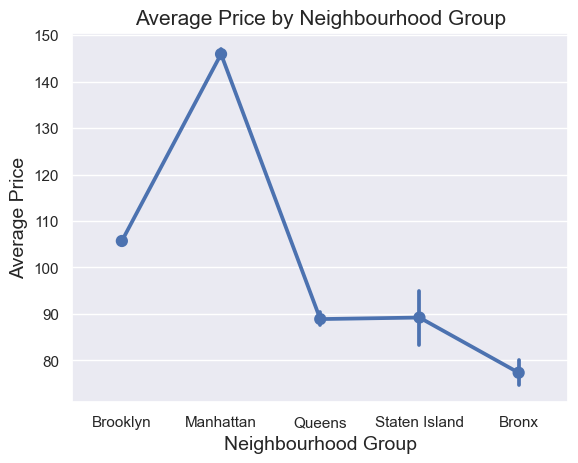

In [56]:
sns.pointplot(x = 'neighbourhood_group', y='price', data=Airbnb_df, estimator = np.mean)
plt.xlabel('Neighbourhood Group',fontsize=14)
plt.ylabel('Average Price',fontsize=14)
plt.title('Average Price by Neighbourhood Group',fontsize=15)

**Observations -->**

*   The average price of a listing in New York City varies significantly across different neighborhoods, with **Manhattan having the highest 146 dollars/day  average price** and **the Bronx having the lowest near 77 dollars/day.**

*   In second graph price distribution is very high in Manhattan and Brooklyn. 
but Manhattan have more varity in price range, you can see in second violinplot.

*   The average price increases as you move from the outer boroughs (Bronx, Brooklyn, Queens, and Staten Island) towards the center of the city (Manhattan).

*   The average price in queens and Staten Island is relatively similar, despite being in different parts of the city.

*   The data suggests that the overall cost of living in New York City is higher in the center of the city (Manhattan) compared to the outer boroughs. This is likely due to the fact that Manhattan is the most densely populated and commercially important borough, and therefore has higher demand for housing in the centrally located neighborhoods

---

**Price Distribution Of Each Neighborhood Group using Violin Plot**

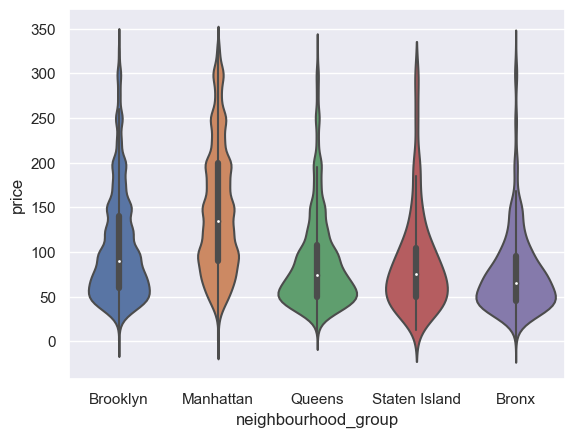

In [57]:
ax= sns.violinplot(x='neighbourhood_group',y='price',data= Airbnb_df)

**Observations -->**

*   price distribution is very high in Manhattan and Brooklyn. but Manhattan have more Diversity in price range, you can see in violin plot.

*   Queens and Bronx have same price distribution but in Queens area more distribution in 50$ to 100$ but diversity in price is not like Manhattan and Brooklyn.

---



**Count Of Each Room Types In Entire NYC Using Multiple Bar Plot**

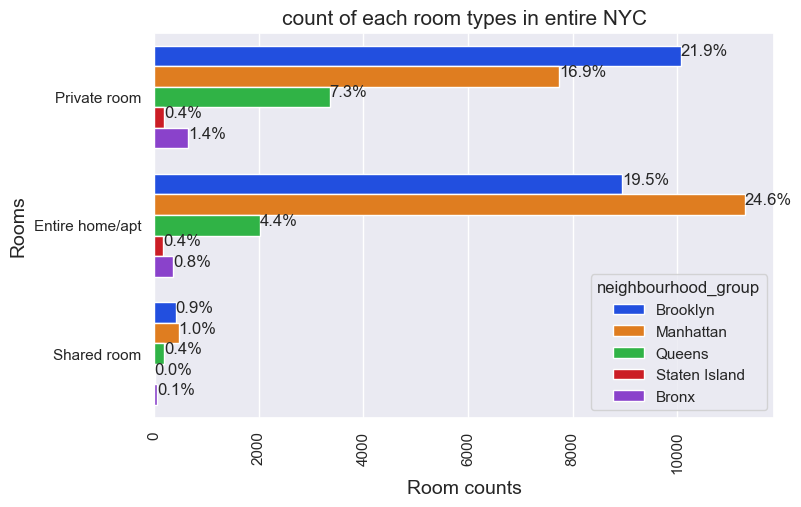

In [58]:
plt.rcParams['figure.figsize'] = (8, 5)
ax = sns.countplot(y='room_type', hue='neighbourhood_group', data=Airbnb_df, palette='bright')
total = len(Airbnb_df['room_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.title('count of each room types in entire NYC', fontsize='15')
plt.xlabel('Room counts', fontsize='14')
plt.xticks(rotation=90)
plt.ylabel('Rooms', fontsize='14')
plt.show()

**Observations -->**

* Manhattan has more listed properties with Entire home/apt around 24.6% of total listed properties followed by Brooklyn with around 19.5%.

*   Private rooms are more in Brooklyn as in 21.9% of the total listed properties followed by Manhattan with 16.9% of them. While 7.3% of private rooms are from Queens.

*   Very few of the total listed have shared rooms listed on Airbnb where there's negligible or almost very rare shared rooms in Staten Island and Bronx.

*   We can infer that Brooklyn,Queens,Bronx has more private room types while Manhattan which has the highest no of listings in entire NYC has more Entire home/apt room types.


---





---

**use latitude and longitude in scatterplot map and find neighbourhood_groups**

Text(0.5, 1.0, 'Location Co-ordinates')

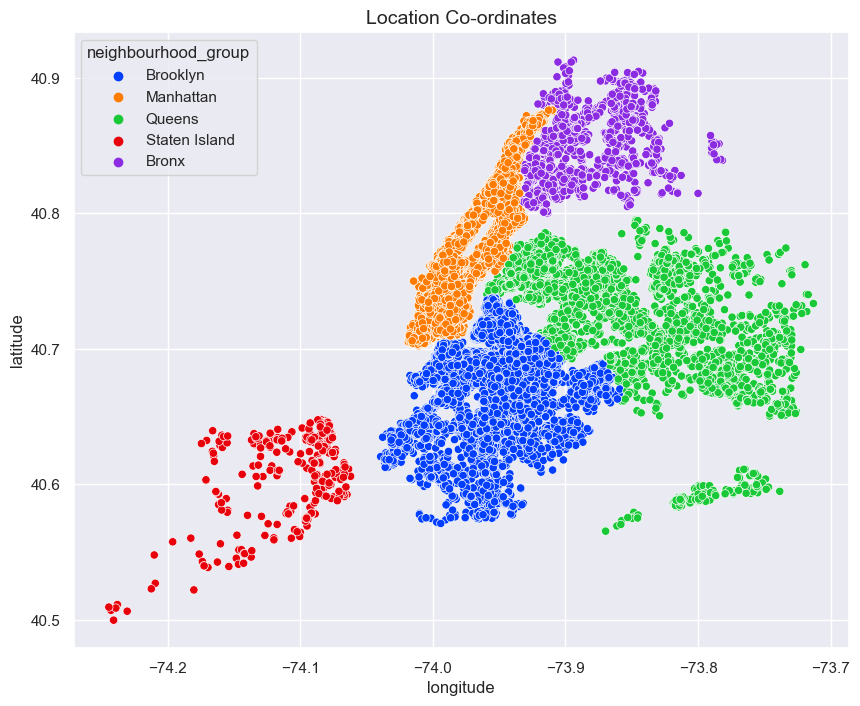

In [59]:
sns.set(rc={"figure.figsize": (10, 8)})
ax = sns.scatterplot(data=Airbnb_df, x="longitude", y="latitude", hue='neighbourhood_group', palette='bright')
ax.set_title('Location Co-ordinates', fontsize='14')



---
**(15) Price variations in NYC Neighbourhood groups using scatter plot**


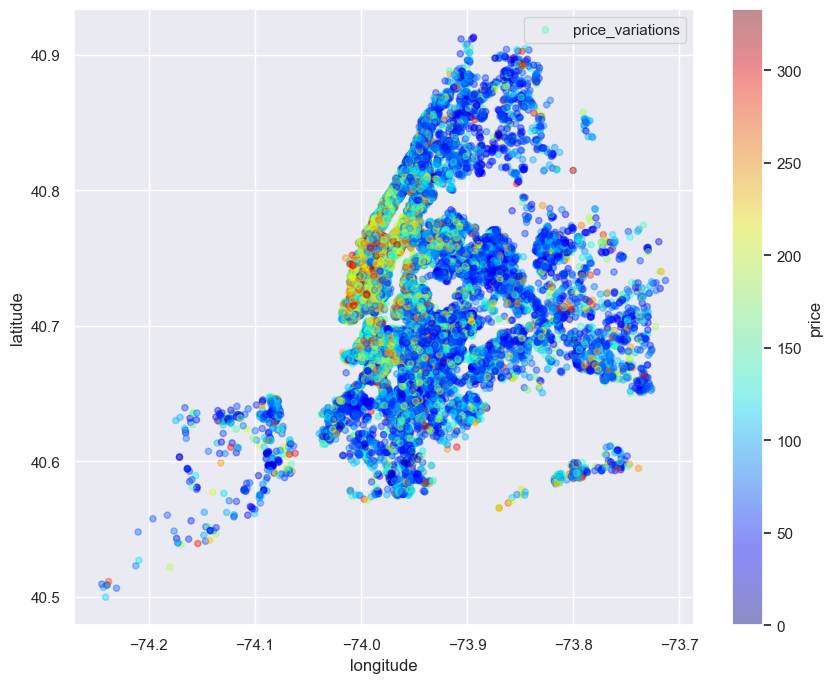

In [60]:
lat_long = Airbnb_df.plot(kind='scatter', x='longitude', y='latitude', label='price_variations', c='price', cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10, 8))
lat_long.legend()

**Observations -->**

*   The range of prices for accommodations in Manhattan is particularly high, indicating that it is the most expensive place to stay in NYC due to its various attractive amenities, as shown in the attached image.

*   they are likely to attract a lot of tourists or visitors because of more valuable things to visit so price is higher than other neighbourhood groups.

*   Travelers are likely to spent more days in this area because of popular amenities, high concentration of tourist attractions and public transports.



---



---
**(16) Find Best Location Listing/Property Location For Travelers and Hosts**

<AxesSubplot:title={'center':'Average Airbnb Reviews by Neighborhoods in New York City'}, xlabel='longitude', ylabel='latitude'>

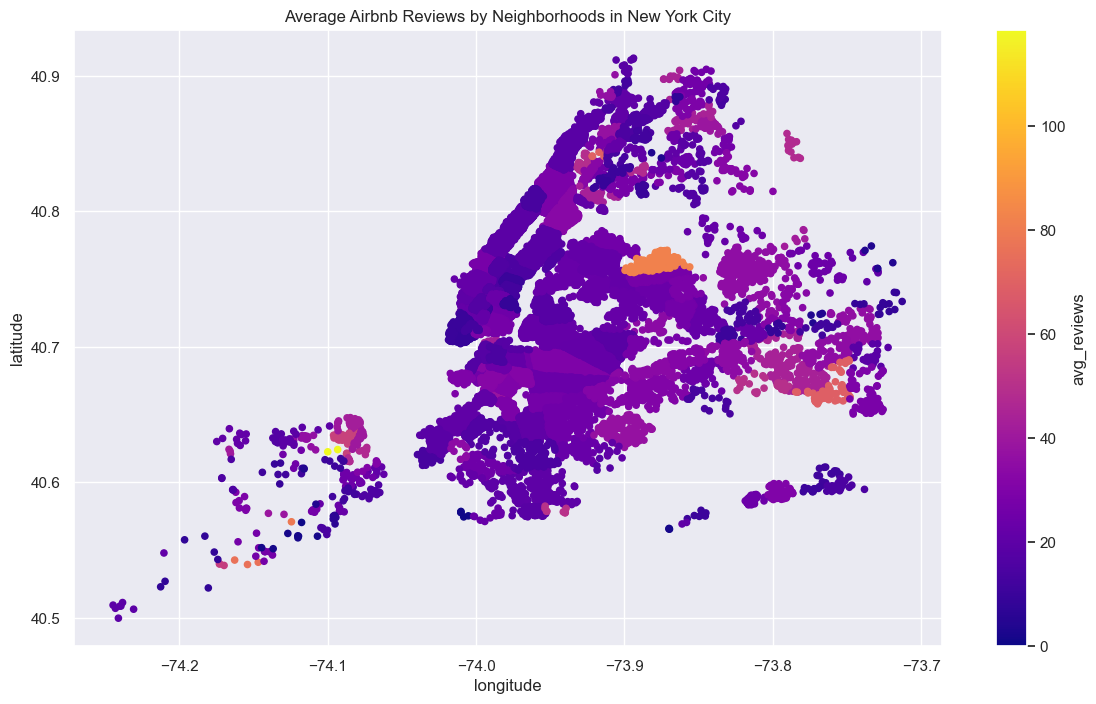

In [61]:
neighbourhood_avg_reviews = Airbnb_df.groupby("neighbourhood")["total_reviews"].mean()
# Create a new DataFrame with the average number of reviews for each neighborhood
neighbourhood_reviews = pd.DataFrame({"neighbourhood": neighbourhood_avg_reviews.index, "avg_reviews": neighbourhood_avg_reviews.values})
# Merge the average number of reviews data with the original DataFrame
df = Airbnb_df.merge(neighbourhood_reviews, on="neighbourhood")
fig = df.plot.scatter(x="longitude", y="latitude", c="avg_reviews", title="Average Airbnb Reviews by Neighborhoods in New York City", figsize=(14,8), cmap="plasma")
fig

**Observations -->**

* I have attached a photo of this map because of some valuable insight. The neighborhoods near the airport in Queens would have a higher average number of reviews, as they are likely to attract a lot of tourists or visitors who are passing through the area. The proximity to the airport could make these neighborhoods a convenient and appealing place to stay for travelers.

*   There could also be other factors contributing to the high average number of reviews in these neighborhoods. For example, they may have a higher concentration of high-quality listings or attractions that attract more visitors and result in more reviews and Airport is key factor i think this is make sense.




---




# **Thank You**


